In [ ]:
%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
id='1Ap3pmeSdgQUEHXaNcUB3kxGZVTwjXHY8'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('train_labels.csv')

In [ ]:
train_labels = pd.read_csv('train_labels.csv', index_col='building_id')
train_labels.tail()

,damage_grade
building_id,
688636,2
669485,3
602512,3
151409,2
747594,3


In [ ]:
id='1EBZj8ChDcTigwwL7E7FPLGqYmvNGAanY'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('train_values.csv')

In [ ]:
train_values = pd.read_csv('train_values.csv', index_col='building_id')
train_values

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_values.columns

Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
     

In [ ]:
train_values.sum()

geo_level_1_id                                                                      3622446
geo_level_2_id                                                                    182700764
geo_level_3_id                                                                   1630808782
count_floors_pre_eq                                                                  555008
age                                                                                 6915055
area_percentage                                                                     2089512
height_percentage                                                                   1416201
land_surface_condition                    tottttnttttttttntttttttntttntttttttttttttttttn...
foundation_type                           rrrrrrrwrirurrrrrrurrrrrrrrurrrwrrhrrrrrrurrri...
roof_type                                 nnnnnnnqqnqnnqnnnnnnnnqqnqnqnnnqnnnqqqnqnqnqnx...
ground_floor_type                         fxffffxvfvfvxfffffvffffffffffffvffffff

In [ ]:
train_values.dtypes

geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_cement_mortar_brick     int64
has_superstructure_t

#Feature engineering

In [ ]:
train_values.age.value_counts()

10     38896
15     36010
5      33697
20     32182
0      26041
25     24366
30     18028
35     10710
40     10559
50      7257
45      4711
60      3612
80      3055
55      2033
70      1975
995     1390
100     1364
65      1123
90      1085
85       847
75       512
95       414
120      180
150      142
200      106
110      100
105       89
125       37
115       21
140        9
130        9
180        7
160        6
170        6
175        5
135        5
145        3
190        3
195        2
165        2
155        1
185        1
Name: age, dtype: int64

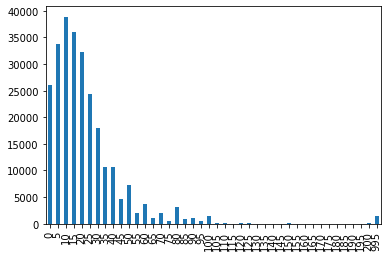

In [ ]:
train_values.age.value_counts().sort_index().plot.bar()

In [ ]:
train_values['other_floor_type'].value_counts()

q    165282
x     43448
j     39843
s     12028
Name: other_floor_type, dtype: int64

In [ ]:
train_values['plan_configuration'].value_counts()

d    250072
q      5692
u      3649
s       346
c       325
a       252
o       159
m        46
n        38
f        22
Name: plan_configuration, dtype: int64

In [ ]:
train_values[['has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone','has_superstructure_stone_flag',\
                     'has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick',\
                     'has_superstructure_timber','has_superstructure_bamboo','has_superstructure_rc_non_engineered','has_superstructure_rc_engineered',\
                     'has_superstructure_other']].sum()

has_superstructure_adobe_mud               23101
has_superstructure_mud_mortar_stone       198561
has_superstructure_stone_flag               8947
has_superstructure_cement_mortar_stone      4752
has_superstructure_mud_mortar_brick        17761
has_superstructure_cement_mortar_brick     19615
has_superstructure_timber                  66450
has_superstructure_bamboo                  22154
has_superstructure_rc_non_engineered       11099
has_superstructure_rc_engineered            4133
has_superstructure_other                    3905
dtype: int64

In [ ]:
train_values['count_families'].value_counts()

1    226115
0     20862
2     11294
3      1802
4       389
5       104
6        22
7         7
9         4
8         2
Name: count_families, dtype: int64

In [ ]:
train_values_subset = train_values

In [ ]:
#train_values_subset = pd.get_dummies(train_values_subset)

In [ ]:
train_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


##Agregamos columnas


Verificamos que no haya edificios duplicados y nulos

In [ ]:
train_values_subset.reset_index()['building_id'].drop_duplicates()

0         802906
1          28830
2          94947
3         590882
4         201944
           ...  
260596    688636
260597    669485
260598    602512
260599    151409
260600    747594
Name: building_id, Length: 260601, dtype: int64

In [ ]:
train_values_subset.dropna()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_values_subset['volumen'] = train_values_subset['area_percentage']*train_values_subset['height_percentage']

In [ ]:
train_values.sum()

geo_level_1_id                                                                      3622446
geo_level_2_id                                                                    182700764
geo_level_3_id                                                                   1630808782
count_floors_pre_eq                                                                  555008
age                                                                                 6915055
area_percentage                                                                     2089512
height_percentage                                                                   1416201
land_surface_condition                    tottttnttttttttntttttttntttntttttttttttttttttn...
foundation_type                           rrrrrrrwrirurrrrrrurrrrrrrrurrrwrrhrrrrrrurrri...
roof_type                                 nnnnnnnqqnqnnqnnnnnnnnqqnqnqnnnqnnnqqqnqnqnqnx...
ground_floor_type                         fxffffxvfvfvxfffffvffffffffffffvffffff

In [ ]:
train_values_subset['combinacion_materiales']=train_values_subset.iloc[:,7:18].sum(axis=1)

In [ ]:
train_values_subset.sum()

geo_level_1_id                                                                      3622446
geo_level_2_id                                                                    182700764
geo_level_3_id                                                                   1630808782
count_floors_pre_eq                                                                  555008
age                                                                                 6915055
area_percentage                                                                     2089512
height_percentage                                                                   1416201
land_surface_condition                    tottttnttttttttntttttttntttntttttttttttttttttn...
foundation_type                           rrrrrrrwrirurrrrrrurrrrrrrrurrrwrrhrrrrrrurrri...
roof_type                                 nnnnnnnqqnqnnqnnnnnnnnqqnqnqnnnqnnnqqqnqnqnqnx...
ground_floor_type                         fxffffxvfvfvxfffffvffffffffffffvffffff

In [ ]:
train_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,volumen,combinacion_materiales
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,30,2
28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,56,1
94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,25,1
590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,30,1
201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,72,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,18,1
669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,30,1
602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,42,1


In [ ]:
train_values_subset['combinacion_usos'] = train_values['has_secondary_use_agriculture']+\
train_values['has_secondary_use_hotel']+train_values['has_secondary_use_rental']+train_values['has_secondary_use_institution']+\
train_values['has_secondary_use_school']+train_values['has_secondary_use_industry']+\
train_values['has_secondary_use_health_post']+train_values['has_secondary_use_gov_office']+\
train_values['has_secondary_use_use_police']+train_values['has_secondary_use_other']

In [ ]:
train_values_subset['area/altura'] = train_values_subset['area_percentage']/train_values_subset['height_percentage']

In [ ]:
train_values_subset['combinacion_usos'].sum()

29713

In [ ]:
train_values_subset['antiguedad_material'] = train_values_subset['age']*train_values_subset['has_superstructure_mud_mortar_stone']

In [ ]:
train_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,volumen,combinacion_materiales,combinacion_usos,area/altura,antiguedad_material
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,30,2,0,1.200000,30
28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,56,1,0,1.142857,10
94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,25,1,0,1.000000,10
590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,30,1,0,1.200000,10
201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,72,1,0,0.888889,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,18,1,0,2.000000,55
669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,30,1,0,1.200000,0
602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,42,1,0,0.857143,55


#Mas Features

In [ ]:
p1 = train_values_subset.groupby(['geo_level_1_id'])['has_superstructure_mud_mortar_stone'].agg('mean')
train_values_subset = pd.merge(train_values_subset, p1.reset_index(),suffixes=["","_geo_level_1"], how='left', on=['geo_level_1_id'])

In [ ]:
p2 = train_values_subset.groupby(['geo_level_2_id'])['has_superstructure_mud_mortar_stone'].agg('mean')
train_values_subset = pd.merge(train_values_subset, p2.reset_index(),suffixes=["","_geo_level_2"], how='left', on=['geo_level_2_id'])

In [ ]:
p3 = train_values_subset.groupby(['geo_level_3_id'])['has_superstructure_mud_mortar_stone'].agg('mean')
train_values_subset = pd.merge(train_values_subset, p3.reset_index(),suffixes=["","_geo_level_3"], how='left', on=['geo_level_3_id'])

In [ ]:
train_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,volumen,combinacion_materiales,combinacion_usos,area/altura,antiguedad_material,has_superstructure_mud_mortar_stone_geo_level_1,has_superstructure_mud_mortar_stone_geo_level_2,has_superstructure_mud_mortar_stone_geo_level_3
0,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,30,2,0,1.200000,30,0.748083,0.900000,0.864865
1,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,56,1,0,1.142857,10,0.906184,0.974874,0.937500
2,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,25,1,0,1.000000,10,0.960508,0.840341,0.933824
3,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,30,1,0,1.200000,10,0.889155,0.970732,0.903226
4,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,72,1,0,0.888889,0,0.426034,0.356455,0.581967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,18,1,0,2.000000,55,0.894026,0.974138,1.000000
260597,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,30,1,0,1.200000,0,0.928666,0.965517,1.000000
260598,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,42,1,0,0.857143,55,0.928666,0.927928,0.954545
260599,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,84,0,0,2.333333,0,0.460049,0.039624,0.076271


In [ ]:
a1 = train_values_subset.groupby(['geo_level_1_id'])['age'].agg('median')
train_values_subset = pd.merge(train_values_subset, a1.reset_index(), suffixes=["", "_geo_level_id1"], how='left', on=['geo_level_1_id'])

In [ ]:
train_values_subset['age_geo_level_id1'].value_counts()

15    129748
20     55331
10     43789
30     28292
25      3441
Name: age_geo_level_id1, dtype: int64

In [ ]:
a2 = train_values_subset.groupby(['geo_level_2_id'])['age'].agg('median')
train_values_subset = pd.merge(train_values_subset, a2.reset_index(), suffixes=["", "_geo_level_id2"], how='left', on=['geo_level_2_id'])

In [ ]:
train_values_subset['age_geo_level_id2'].value_counts()

15.0     91064
20.0     68530
10.0     45996
25.0     27556
5.0       6287
60.0      5827
30.0      4357
35.0      3589
45.0      1958
22.5      1694
17.5      1284
12.5       658
40.0       340
27.5       290
32.5       242
995.0      205
50.0       185
80.0       173
47.5       110
55.0        75
0.0         57
95.0        49
37.5        38
42.5        34
7.5          2
100.0        1
Name: age_geo_level_id2, dtype: int64

In [ ]:
a3 = train_values_subset.groupby(['geo_level_3_id'])['age'].agg('median')
train_values_subset = pd.merge(train_values_subset, a3.reset_index(), suffixes=["", "_geo_level_id3"], how='left', on=['geo_level_3_id'])

In [ ]:
train_values_subset['age_geo_level_id3'].value_counts()

15.0     65336
20.0     55131
10.0     49929
25.0     27351
5.0      13091
30.0     11125
17.5      6908
12.5      5264
22.5      4030
35.0      3565
40.0      2396
27.5      2186
7.5       1846
50.0      1779
45.0      1471
80.0      1187
60.0      1120
32.5      1040
90.0       908
995.0      606
37.5       576
100.0      536
42.5       428
75.0       395
55.0       393
65.0       334
0.0        311
85.0       292
70.0       250
62.5       194
52.5       188
47.5       140
95.0       137
57.5        62
2.5         34
550.0        8
200.0        7
72.5         6
82.5         6
67.5         6
500.0        4
532.5        4
105.0        3
502.5        2
497.5        2
545.0        2
102.5        2
522.5        2
507.5        2
77.5         2
515.0        2
510.0        2
Name: age_geo_level_id3, dtype: int64

In [ ]:
train_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,volumen,combinacion_materiales,combinacion_usos,area/altura,antiguedad_material,has_superstructure_mud_mortar_stone_geo_level_1,has_superstructure_mud_mortar_stone_geo_level_2,has_superstructure_mud_mortar_stone_geo_level_3,age_geo_level_id1,age_geo_level_id2,age_geo_level_id3
0,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,30,2,0,1.200000,30,0.748083,0.900000,0.864865,20,20.0,20.0
1,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,56,1,0,1.142857,10,0.906184,0.974874,0.937500,15,15.0,10.0
2,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,25,1,0,1.000000,10,0.960508,0.840341,0.933824,15,15.0,20.0
3,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,30,1,0,1.200000,10,0.889155,0.970732,0.903226,20,20.0,15.0
4,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,72,1,0,0.888889,0,0.426034,0.356455,0.581967,30,30.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,18,1,0,2.000000,55,0.894026,0.974138,1.000000,20,20.0,17.5
260597,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,30,1,0,1.200000,0,0.928666,0.965517,1.000000,15,15.0,15.0
260598,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,42,1,0,0.857143,55,0.928666,0.927928,0.954545,15,20.0,25.0
260599,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,84,0,0,2.333333,0,0.460049,0.039624,0.076271,10,10.0,15.0


In [ ]:
v1 = train_values_subset.groupby(['geo_level_1_id'])['volumen'].agg('median')
train_values_subset = pd.merge(train_values_subset, v1.reset_index(), suffixes=["", "_geo_level_id1"], how='left', on=['geo_level_1_id'])

In [ ]:
v2 = train_values_subset.groupby(['geo_level_2_id'])['volumen'].agg('median')
train_values_subset = pd.merge(train_values_subset, v2.reset_index(), suffixes=["", "_geo_level_id2"], how='left', on=['geo_level_2_id'])

In [ ]:
v3 = train_values_subset.groupby(['geo_level_3_id'])['volumen'].agg('median')
train_values_subset = pd.merge(train_values_subset, v3.reset_index(), suffixes=["", "_geo_level_id3"], how='left', on=['geo_level_3_id'])

In [ ]:
train_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,volumen,combinacion_materiales,combinacion_usos,area/altura,antiguedad_material,has_superstructure_mud_mortar_stone_geo_level_1,has_superstructure_mud_mortar_stone_geo_level_2,has_superstructure_mud_mortar_stone_geo_level_3,age_geo_level_id1,age_geo_level_id2,age_geo_level_id3,volumen_geo_level_id1,volumen_geo_level_id2,volumen_geo_level_id3
0,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,30,2,0,1.200000,30,0.748083,0.900000,0.864865,20,20.0,20.0,45.0,36.0,35.0
1,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,56,1,0,1.142857,10,0.906184,0.974874,0.937500,15,15.0,10.0,36.0,36.0,56.0
2,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,25,1,0,1.000000,10,0.960508,0.840341,0.933824,15,15.0,20.0,36.0,42.0,58.5
3,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,30,1,0,1.200000,10,0.889155,0.970732,0.903226,20,20.0,15.0,35.0,15.0,40.0
4,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,72,1,0,0.888889,0,0.426034,0.356455,0.581967,30,30.0,30.0,49.0,48.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,18,1,0,2.000000,55,0.894026,0.974138,1.000000,20,20.0,17.5,33.0,21.0,24.0
260597,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,30,1,0,1.200000,0,0.928666,0.965517,1.000000,15,15.0,15.0,40.0,48.0,56.0
260598,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,42,1,0,0.857143,55,0.928666,0.927928,0.954545,15,20.0,25.0,40.0,35.0,37.5
260599,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,84,0,0,2.333333,0,0.460049,0.039624,0.076271,10,10.0,15.0,35.0,51.0,51.0


#Mas mas features

In [ ]:
train_values_subset.dtypes

geo_level_1_id                                       int64
geo_level_2_id                                       int64
geo_level_3_id                                       int64
count_floors_pre_eq                                  int64
age                                                  int64
area_percentage                                      int64
height_percentage                                    int64
land_surface_condition                              object
foundation_type                                     object
roof_type                                           object
ground_floor_type                                   object
other_floor_type                                    object
position                                            object
plan_configuration                                  object
has_superstructure_adobe_mud                         int64
has_superstructure_mud_mortar_stone                  int64
has_superstructure_stone_flag                        int

In [ ]:
train_values_subset['geo_level_1_foundation'] = (train_values_subset['geo_level_1_id'].astype('string')+train_values_subset['foundation_type']).astype('object')
train_values_subset['geo_level_2_foundation'] = (train_values_subset['geo_level_2_id'].astype('string')+train_values_subset['foundation_type']).astype('object')
train_values_subset['geo_level_3_foundation'] = (train_values_subset['geo_level_3_id'].astype('string')+train_values_subset['foundation_type']).astype('object')

In [ ]:
train_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,volumen,combinacion_materiales,combinacion_usos,area/altura,antiguedad_material,has_superstructure_mud_mortar_stone_geo_level_1,has_superstructure_mud_mortar_stone_geo_level_2,has_superstructure_mud_mortar_stone_geo_level_3,age_geo_level_id1,age_geo_level_id2,age_geo_level_id3,volumen_geo_level_id1,volumen_geo_level_id2,volumen_geo_level_id3,geo_level_1_foundation,geo_level_2_foundation,geo_level_3_foundation
0,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,30,2,0,1.200000,30,0.748083,0.900000,0.864865,20,20.0,20.0,45.0,36.0,35.0,6r,487r,12198r
1,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,56,1,0,1.142857,10,0.906184,0.974874,0.937500,15,15.0,10.0,36.0,36.0,56.0,8r,900r,2812r
2,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,25,1,0,1.000000,10,0.960508,0.840341,0.933824,15,15.0,20.0,36.0,42.0,58.5,21r,363r,8973r
3,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,30,1,0,1.200000,10,0.889155,0.970732,0.903226,20,20.0,15.0,35.0,15.0,40.0,22r,418r,10694r
4,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,72,1,0,0.888889,0,0.426034,0.356455,0.581967,30,30.0,30.0,49.0,48.0,56.0,11r,131r,1488r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,18,1,0,2.000000,55,0.894026,0.974138,1.000000,20,20.0,17.5,33.0,21.0,24.0,25r,1335r,1621r
260597,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,30,1,0,1.200000,0,0.928666,0.965517,1.000000,15,15.0,15.0,40.0,48.0,56.0,17r,715r,2060r
260598,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,42,1,0,0.857143,55,0.928666,0.927928,0.954545,15,20.0,25.0,40.0,35.0,37.5,17r,51r,8163r
260599,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,84,0,0,2.333333,0,0.460049,0.039624,0.076271,10,10.0,15.0,35.0,51.0,51.0,26r,39r,1851r


In [ ]:
train_values_subset.dtypes

geo_level_1_id                                       int64
geo_level_2_id                                       int64
geo_level_3_id                                       int64
count_floors_pre_eq                                  int64
age                                                  int64
area_percentage                                      int64
height_percentage                                    int64
land_surface_condition                              object
foundation_type                                     object
roof_type                                           object
ground_floor_type                                   object
other_floor_type                                    object
position                                            object
plan_configuration                                  object
has_superstructure_adobe_mud                         int64
has_superstructure_mud_mortar_stone                  int64
has_superstructure_stone_flag                        int

#Pasamos geo level a categorical

In [ ]:
train_values_subset['geo_level_1_id'] = train_values_subset['geo_level_1_id'].astype('object')

In [ ]:
train_values_subset['geo_level_2_id'] = train_values_subset['geo_level_2_id'].astype('object')

In [ ]:
train_values_subset['geo_level_3_id'] = train_values_subset['geo_level_3_id'].astype('object')

In [ ]:
train_values_subset.dtypes

geo_level_1_id                                      object
geo_level_2_id                                      object
geo_level_3_id                                      object
count_floors_pre_eq                                  int64
age                                                  int64
area_percentage                                      int64
height_percentage                                    int64
land_surface_condition                              object
foundation_type                                     object
roof_type                                           object
ground_floor_type                                   object
other_floor_type                                    object
position                                            object
plan_configuration                                  object
has_superstructure_adobe_mud                         int64
has_superstructure_mud_mortar_stone                  int64
has_superstructure_stone_flag                        int

#CatBoost

In [ ]:
pip install catboost

     |████████████████████████████████| 69.2 MB 4.8 kB/s 


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_values_subset, train_labels, test_size=0.3, random_state=2018)

In [ ]:
import catboost as cb
from sklearn.model_selection import train_test_split, GridSearchCV
params = {'depth': [4, 7, 10],
          'learning_rate': [0.03, 0.1, 0.15],
          'l2_leaf_reg': [1, 4, 9],
          'iterations': [300, 500],}
cb = cb.CatBoostClassifier()
cb_model = GridSearchCV(cb, params, scoring="f1_micro", cv=3)
cb_model.fit(X_train, y_train)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Se truncaron las últimas líneas 5000 del resultado de transmisión.
0:	learn: 1.0797725	total: 430ms	remaining: 3m 34s
1:	learn: 1.0617724	total: 861ms	remaining: 3m 34s
2:	learn: 1.0450625	total: 1.3s	remaining: 3m 34s
3:	learn: 1.0293110	total: 1.74s	remaining: 3m 35s
4:	learn: 1.0143529	total: 2.2s	remaining: 3m 37s
5:	learn: 1.0008175	total: 2.65s	remaining: 3m 37s
6:	learn: 0.9876830	total: 3.09s	remaining: 3m 37s
7:	learn: 0.9751655	total: 3.54s	remaining: 3m 37s
8:	learn: 0.9633926	total: 3.98s	remaining: 3m 36s
9:	learn: 0.9519086	total: 4.42s	remaining: 3m 36s
10:	learn: 0.9413869	total: 4.89s	remaining: 3m 37s
11:	learn: 0.9315677	total: 5.34s	remaining: 3m 37s
12:	learn: 0.9217864	total: 5.77s	remaining: 3m 36s
13:	learn: 0.9125229	total: 6.21s	remaining: 3m 35s
14:	learn: 0.9036800	total: 6.66s	remaining: 3m 35s
15:	learn: 0.8953673	total: 7.1s	remaining: 3m 34s
16:	learn: 0.8872141	total: 7.55s	remaining: 3m 34s
17:	learn: 0.8794940	total: 7.99s	remaining: 3m 34s
18:	learn:

GridSearchCV(cv=3, error_score=nan,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fd286291810>,
             iid='deprecated', n_jobs=None,
             param_grid={'depth': [4, 7, 10], 'iterations': [300, 500],
                         'l2_leaf_reg': [1, 4, 9],
                         'learning_rate': [0.03, 0.1, 0.15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_micro', verbose=0)

In [ ]:
cb_model.best_score_

0.7413605887473063

In [ ]:
categorical_features_indices = np.where(X_train.dtypes =='object')[0]

In [ ]:
categorical_features_indices

array([ 0,  1,  2,  7,  8,  9, 10, 11, 12, 13, 25])

##Catboost con multiclass one vs all y mas mas features

In [ ]:
#Entreno con los mejores parametros que me dio el grid search
import catboost as cb
clf = cb.CatBoostClassifier(eval_metric="TotalF1", depth=10, iterations=500, l2_leaf_reg=9,
                            learning_rate=0.15, loss_function='MultiClassOneVsAll')

clf.fit(X_train, y_train,cat_features=categorical_features_indices)

0:	learn: 0.6885093	total: 4.68s	remaining: 38m 53s
1:	learn: 0.6917583	total: 9.55s	remaining: 39m 38s
2:	learn: 0.6894265	total: 13.7s	remaining: 37m 56s
3:	learn: 0.6915082	total: 18.7s	remaining: 38m 37s
4:	learn: 0.6927571	total: 23.4s	remaining: 38m 41s
5:	learn: 0.6931823	total: 28.3s	remaining: 38m 52s
6:	learn: 0.6942758	total: 33.3s	remaining: 39m 2s
7:	learn: 0.6946657	total: 37.6s	remaining: 38m 34s
8:	learn: 0.6954045	total: 41.5s	remaining: 37m 44s
9:	learn: 0.6968152	total: 46.3s	remaining: 37m 47s
10:	learn: 0.7002133	total: 50.5s	remaining: 37m 25s
11:	learn: 0.7054034	total: 54.7s	remaining: 37m 4s
12:	learn: 0.7080032	total: 59.5s	remaining: 37m 8s
13:	learn: 0.7108461	total: 1m 3s	remaining: 36m 53s
14:	learn: 0.7118182	total: 1m 7s	remaining: 36m 22s
15:	learn: 0.7147732	total: 1m 11s	remaining: 36m 12s
16:	learn: 0.7153955	total: 1m 16s	remaining: 36m 10s
17:	learn: 0.7169648	total: 1m 20s	remaining: 35m 49s
18:	learn: 0.7181050	total: 1m 25s	remaining: 36m
19:	le

In [ ]:
from sklearn.metrics import f1_score

preds = clf.predict(X_test)
f1_score(y_test, preds, average='micro')

0.7506043667898851

Con get_dummies: 0.7439019710671391


En driven: 0,7204

Sin get_dummies con geo_level cat: 0.7493252836366893

En driven: 0,7475

Con nuevo features: 0.7501822693493304

En driven: 0,7453

Con multiclassonevsall: 0.7506043667898851

En driven:0,7463

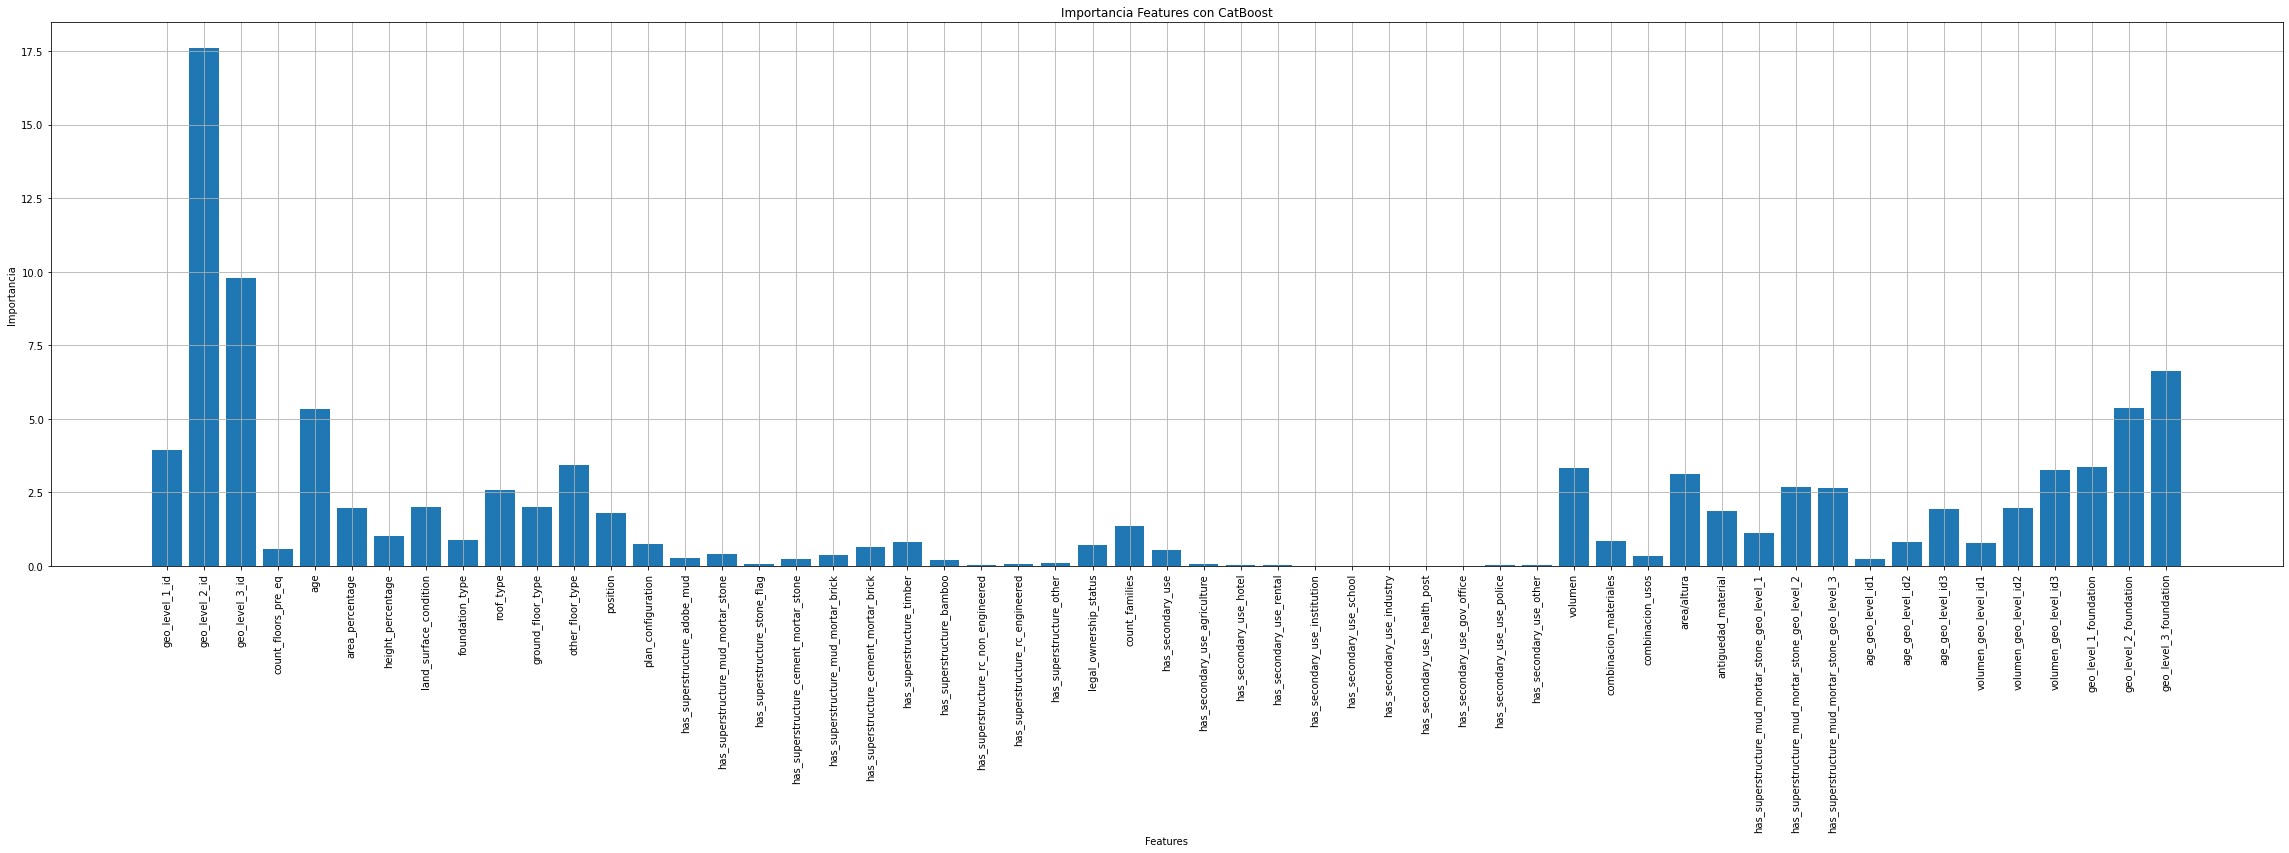

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(40,10))
plt.bar(X_train.columns, clf.feature_importances_)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia Features con CatBoost')
plt.grid(True)
plt.show()

##Catboost y multiclassonevsall sin mas mas features

In [ ]:
#Entreno con los mejores parametros que me dio el grid search
import catboost as cb
clf = cb.CatBoostClassifier(eval_metric="TotalF1", depth=10, iterations=500, l2_leaf_reg=9,
                            learning_rate=0.15, loss_function='MultiClassOneVsAll')

clf.fit(X_train, y_train,cat_features=categorical_features_indices)

0:	learn: 0.6858633	total: 4.06s	remaining: 33m 44s
1:	learn: 0.6837261	total: 7.67s	remaining: 31m 51s
2:	learn: 0.6889762	total: 10.5s	remaining: 28m 52s
3:	learn: 0.6905808	total: 14.1s	remaining: 29m 13s
4:	learn: 0.6910785	total: 18.2s	remaining: 30m 4s
5:	learn: 0.6932641	total: 21.7s	remaining: 29m 45s
6:	learn: 0.6935049	total: 26s	remaining: 30m 33s
7:	learn: 0.6944527	total: 29.8s	remaining: 30m 32s
8:	learn: 0.6953838	total: 34.2s	remaining: 31m 4s
9:	learn: 0.6962209	total: 37.8s	remaining: 30m 51s
10:	learn: 0.6974118	total: 41.9s	remaining: 31m
11:	learn: 0.6983152	total: 46.1s	remaining: 31m 13s
12:	learn: 0.7021401	total: 50.3s	remaining: 31m 25s
13:	learn: 0.7069742	total: 53.4s	remaining: 30m 52s
14:	learn: 0.7111353	total: 56.9s	remaining: 30m 38s
15:	learn: 0.7137404	total: 1m 1s	remaining: 30m 57s
16:	learn: 0.7155883	total: 1m 5s	remaining: 30m 51s
17:	learn: 0.7166699	total: 1m 9s	remaining: 30m 54s
18:	learn: 0.7183424	total: 1m 13s	remaining: 31m 1s
19:	learn: 

In [ ]:
from sklearn.metrics import f1_score

preds = clf.predict(X_test)
f1_score(y_test, preds, average='micro')

0.749402028625881

Con get_dummies: 0.7439019710671391


En driven: 0,7204

Sin get_dummies con geo_level cat: 0.7493252836366893

En driven: 0,7475

Con nuevo features: 0.7501822693493304

En driven: 0,7453

Con multiclassonevsall y nuevos features: 0.7506043667898851

En driven:0,7463

Con multiclassonevsall y features originales: 0.749402028625881

En driven: 0,7471


#Entrega

In [ ]:
id='1GkhS3TIJdxEbdn2bfA9KMaK5t4KbkWzz'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('test_values.csv')

In [ ]:
test_values = pd.read_csv('test_values.csv', index_col='building_id')
test_values.tail()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
310028,4,605,3623,3,70,20,6,t,r,q,f,q,t,d,0,1,0,0,0,0,1,0,0,0,0,w,1,1,1,0,0,0,0,0,0,0,0,0
663567,10,1407,11907,3,25,6,7,n,r,n,f,q,s,d,1,1,1,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1049160,22,1136,7712,1,50,3,3,t,r,n,f,j,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
442785,6,1041,912,2,5,9,5,t,r,n,f,q,s,d,1,1,0,0,0,0,0,0,0,0,0,a,1,0,0,0,0,0,0,0,0,0,0,0
501372,26,36,6436,2,10,11,4,t,r,q,v,q,s,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#test_values_subset = test_values[selected_features]
test_values_subset=test_values
#test_values_subset['plan_configuration_d'] = np.where(test_values_subset['plan_configuration'] == 'd', 1,0)
#test_values_subset = test_values_subset.drop(columns='plan_configuration')
#test_values_subset = pd.get_dummies(test_values_subset)
test_values_subset['volumen'] = test_values_subset['area_percentage']*test_values_subset['height_percentage']
test_values_subset['combinacion_materiales']=test_values_subset.iloc[:,7:18].sum(axis=1)

In [ ]:
test_values.sum()

geo_level_1_id                                                                      1206440
geo_level_2_id                                                                     61166202
geo_level_3_id                                                                    543946443
count_floors_pre_eq                                                                  185302
age                                                                                 2306360
area_percentage                                                                      696152
height_percentage                                                                    472223
land_surface_condition                    ttttttnttntttntttttttttntntnttntttttttttttottt...
foundation_type                           rrrrrrrrrrwrrrrrrrurrrrrrrrrurrwrrrrrrrrrrrrrh...
roof_type                                 nnnxqqnnnnqnnnxnnnnnnnnnxnnqnqnnnnnnnqnnnnnnnn...
ground_floor_type                         fffvffvffffvffvffffffxffvfffvfffffffff

In [ ]:
test_values_subset['combinacion_usos'] = test_values['has_secondary_use_agriculture']+\
test_values['has_secondary_use_hotel']+test_values['has_secondary_use_rental']+test_values['has_secondary_use_institution']+\
test_values['has_secondary_use_school']+test_values['has_secondary_use_industry']+\
test_values['has_secondary_use_health_post']+test_values['has_secondary_use_gov_office']+\
test_values['has_secondary_use_use_police']+test_values['has_secondary_use_other']

In [ ]:
test_values_subset['area/altura'] = test_values_subset['area_percentage']/test_values_subset['height_percentage']

In [ ]:
test_values_subset['antiguedad_material'] = test_values_subset['age']*test_values_subset['has_superstructure_mud_mortar_stone']

In [ ]:
test_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,volumen,combinacion_materiales,combinacion_usos,area/altura,antiguedad_material
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
300051,17,596,11307,3,20,7,6,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,42,1,0,1.166667,20
99355,6,141,11987,2,25,13,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0,65,1,1,2.600000,25
890251,22,19,10044,2,5,4,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,20,1,0,0.800000,5
745817,26,39,633,1,0,19,3,t,r,x,v,j,t,d,0,0,0,0,0,1,0,0,0,0,0,v,2,1,0,0,1,0,0,0,0,0,0,0,57,0,1,6.333333,0
421793,17,289,7970,3,15,8,7,t,r,q,f,q,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,56,1,0,1.142857,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310028,4,605,3623,3,70,20,6,t,r,q,f,q,t,d,0,1,0,0,0,0,1,0,0,0,0,w,1,1,1,0,0,0,0,0,0,0,0,0,120,1,1,3.333333,70
663567,10,1407,11907,3,25,6,7,n,r,n,f,q,s,d,1,1,1,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,42,3,0,0.857143,25
1049160,22,1136,7712,1,50,3,3,t,r,n,f,j,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,9,1,0,1.000000,50


In [ ]:
#test_values_subset_imp = test_values_subset[['age','area_percentage','count_floors_pre_eq','height_percentage','count_families','volumen','area/altura','antiguedad_material','combinacion_materiales','foundation_type_r','ground_floor_type_v','plan_configuration_d']]

In [ ]:
p1 = test_values_subset.groupby(['geo_level_1_id'])['has_superstructure_mud_mortar_stone'].agg('mean')
test_values_subset = pd.merge(test_values_subset, p1.reset_index(),suffixes=["","_geo_level_1"], how='left', on=['geo_level_1_id'])

In [ ]:
p2 = test_values_subset.groupby(['geo_level_2_id'])['has_superstructure_mud_mortar_stone'].agg('mean')
test_values_subset = pd.merge(test_values_subset, p2.reset_index(),suffixes=["","_geo_level_2"], how='left', on=['geo_level_2_id'])

In [ ]:
p3 = test_values_subset.groupby(['geo_level_3_id'])['has_superstructure_mud_mortar_stone'].agg('mean')
test_values_subset = pd.merge(test_values_subset, p3.reset_index(),suffixes=["","_geo_level_3"], how='left', on=['geo_level_3_id'])

In [ ]:
test_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,volumen,combinacion_materiales,combinacion_usos,area/altura,antiguedad_material,has_superstructure_mud_mortar_stone_geo_level_1,has_superstructure_mud_mortar_stone_geo_level_2,has_superstructure_mud_mortar_stone_geo_level_3
0,17,596,11307,3,20,7,6,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,42,1,0,1.166667,20,0.925255,0.977778,1.000000
1,6,141,11987,2,25,13,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0,65,1,1,2.600000,25,0.744447,1.000000,1.000000
2,22,19,10044,2,5,4,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,20,1,0,0.800000,5,0.892688,0.941176,0.750000
3,26,39,633,1,0,19,3,t,r,x,v,j,t,d,0,0,0,0,0,1,0,0,0,0,0,v,2,1,0,0,1,0,0,0,0,0,0,0,57,0,1,6.333333,0,0.455801,0.039880,0.010526
4,17,289,7970,3,15,8,7,t,r,q,f,q,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,56,1,0,1.142857,15,0.925255,0.854839,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86863,4,605,3623,3,70,20,6,t,r,q,f,q,t,d,0,1,0,0,0,0,1,0,0,0,0,w,1,1,1,0,0,0,0,0,0,0,0,0,120,1,1,3.333333,70,0.978545,0.989583,1.000000
86864,10,1407,11907,3,25,6,7,n,r,n,f,q,s,d,1,1,1,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,42,3,0,0.857143,25,0.879508,0.885714,1.000000
86865,22,1136,7712,1,50,3,3,t,r,n,f,j,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,9,1,0,1.000000,50,0.892688,0.868852,1.000000
86866,6,1041,912,2,5,9,5,t,r,n,f,q,s,d,1,1,0,0,0,0,0,0,0,0,0,a,1,0,0,0,0,0,0,0,0,0,0,0,45,2,0,1.800000,5,0.744447,0.876190,0.906250


In [ ]:
a1 = test_values_subset.groupby(['geo_level_1_id'])['age'].agg('median')
test_values_subset = pd.merge(test_values_subset, a1.reset_index(), suffixes=["", "_geo_level_id1"], how='left', on=['geo_level_1_id'])

In [ ]:
test_values_subset['age_geo_level_id1'].value_counts()

15    43692
20    17505
10    14187
30     9384
25     2100
Name: age_geo_level_id1, dtype: int64

In [ ]:
a2 = test_values_subset.groupby(['geo_level_2_id'])['age'].agg('median')
test_values_subset = pd.merge(test_values_subset, a2.reset_index(), suffixes=["", "_geo_level_id2"], how='left', on=['geo_level_2_id'])

In [ ]:
test_values_subset['age_geo_level_id2'].value_counts()

15.0     28204
20.0     21724
10.0     15537
25.0      7952
30.0      3413
5.0       2638
22.5      1346
60.0      1177
17.5       914
12.5       832
35.0       774
65.0       732
50.0       421
45.0       360
27.5       278
40.0       154
995.0      110
7.5        100
32.5        72
37.5        34
85.0        24
47.5        22
42.5        18
52.5        12
55.0         7
70.0         4
0.0          4
62.5         2
80.0         2
95.0         1
Name: age_geo_level_id2, dtype: int64

In [ ]:
a3 = test_values_subset.groupby(['geo_level_3_id'])['age'].agg('median')
test_values_subset = pd.merge(test_values_subset, a3.reset_index(), suffixes=["", "_geo_level_id3"], how='left', on=['geo_level_3_id'])

In [ ]:
test_values_subset['age_geo_level_id3'].value_counts()

15.0     17545
10.0     15619
20.0     15175
25.0      8248
5.0       5928
30.0      4047
12.5      3398
17.5      3392
22.5      2246
35.0      1662
27.5      1418
7.5       1388
40.0      1090
50.0       633
45.0       578
32.5       574
80.0       468
0.0        366
37.5       338
60.0       329
100.0      320
55.0       237
47.5       232
995.0      216
42.5       210
2.5        202
90.0       183
65.0       170
70.0       164
85.0       164
52.5        74
95.0        59
75.0        53
57.5        36
67.5        20
120.0       14
517.5       10
62.5        10
512.5        8
507.5        8
505.0        6
510.0        6
77.5         6
72.5         4
200.0        3
500.0        2
117.5        2
502.5        2
145.0        2
110.0        1
180.0        1
105.0        1
Name: age_geo_level_id3, dtype: int64

In [ ]:
test_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,volumen,combinacion_materiales,combinacion_usos,area/altura,antiguedad_material,has_superstructure_mud_mortar_stone_geo_level_1,has_superstructure_mud_mortar_stone_geo_level_2,has_superstructure_mud_mortar_stone_geo_level_3,age_geo_level_id1,age_geo_level_id2,age_geo_level_id3
0,17,596,11307,3,20,7,6,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,42,1,0,1.166667,20,0.925255,0.977778,1.000000,15,20.0,35.0
1,6,141,11987,2,25,13,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0,65,1,1,2.600000,25,0.744447,1.000000,1.000000,20,15.0,40.0
2,22,19,10044,2,5,4,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,20,1,0,0.800000,5,0.892688,0.941176,0.750000,20,20.0,7.5
3,26,39,633,1,0,19,3,t,r,x,v,j,t,d,0,0,0,0,0,1,0,0,0,0,0,v,2,1,0,0,1,0,0,0,0,0,0,0,57,0,1,6.333333,0,0.455801,0.039880,0.010526,10,10.0,10.0
4,17,289,7970,3,15,8,7,t,r,q,f,q,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,56,1,0,1.142857,15,0.925255,0.854839,1.000000,15,20.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86863,4,605,3623,3,70,20,6,t,r,q,f,q,t,d,0,1,0,0,0,0,1,0,0,0,0,w,1,1,1,0,0,0,0,0,0,0,0,0,120,1,1,3.333333,70,0.978545,0.989583,1.000000,15,15.0,37.5
86864,10,1407,11907,3,25,6,7,n,r,n,f,q,s,d,1,1,1,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,42,3,0,0.857143,25,0.879508,0.885714,1.000000,15,15.0,25.0
86865,22,1136,7712,1,50,3,3,t,r,n,f,j,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,9,1,0,1.000000,50,0.892688,0.868852,1.000000,20,20.0,30.0
86866,6,1041,912,2,5,9,5,t,r,n,f,q,s,d,1,1,0,0,0,0,0,0,0,0,0,a,1,0,0,0,0,0,0,0,0,0,0,0,45,2,0,1.800000,5,0.744447,0.876190,0.906250,20,15.0,15.0


In [ ]:
v1 = test_values_subset.groupby(['geo_level_1_id'])['volumen'].agg('median')
test_values_subset = pd.merge(test_values_subset, v1.reset_index(), suffixes=["", "_geo_level_id1"], how='left', on=['geo_level_1_id'])

In [ ]:
v2 = test_values_subset.groupby(['geo_level_2_id'])['volumen'].agg('median')
test_values_subset = pd.merge(test_values_subset, v2.reset_index(), suffixes=["", "_geo_level_id2"], how='left', on=['geo_level_2_id'])

In [ ]:
v3 = test_values_subset.groupby(['geo_level_3_id'])['volumen'].agg('median')
test_values_subset = pd.merge(test_values_subset, v3.reset_index(), suffixes=["", "_geo_level_id3"], how='left', on=['geo_level_3_id'])

In [ ]:
test_values_subset.sum()

geo_level_1_id                                                                               1206440
geo_level_2_id                                                                              61166202
geo_level_3_id                                                                             543946443
count_floors_pre_eq                                                                           185302
age                                                                                          2306360
area_percentage                                                                               696152
height_percentage                                                                             472223
land_surface_condition                             ttttttnttntttntttttttttntntnttntttttttttttottt...
foundation_type                                    rrrrrrrrrrwrrrrrrrurrrrrrrrrurrwrrrrrrrrrrrrrh...
roof_type                                          nnnxqqnnnnqnnnxnnnnnnnnnxnnqnqnnnnnnnqnn

In [ ]:
test_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,volumen,combinacion_materiales,combinacion_usos,area/altura,antiguedad_material,has_superstructure_mud_mortar_stone_geo_level_1,has_superstructure_mud_mortar_stone_geo_level_2,has_superstructure_mud_mortar_stone_geo_level_3,age_geo_level_id1,age_geo_level_id2,age_geo_level_id3,volumen_geo_level_id1,volumen_geo_level_id2,volumen_geo_level_id3
0,17,596,11307,3,20,7,6,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,42,1,0,1.166667,20,0.925255,0.977778,1.000000,15,20.0,35.0,40.0,48.0,45.0
1,6,141,11987,2,25,13,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0,65,1,1,2.600000,25,0.744447,1.000000,1.000000,20,15.0,40.0,45.0,42.0,35.0
2,22,19,10044,2,5,4,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,20,1,0,0.800000,5,0.892688,0.941176,0.750000,20,20.0,7.5,35.0,20.0,32.5
3,26,39,633,1,0,19,3,t,r,x,v,j,t,d,0,0,0,0,0,1,0,0,0,0,0,v,2,1,0,0,1,0,0,0,0,0,0,0,57,0,1,6.333333,0,0.455801,0.039880,0.010526,10,10.0,10.0,35.0,51.0,94.5
4,17,289,7970,3,15,8,7,t,r,q,f,q,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,56,1,0,1.142857,15,0.925255,0.854839,1.000000,15,20.0,15.0,40.0,49.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86863,4,605,3623,3,70,20,6,t,r,q,f,q,t,d,0,1,0,0,0,0,1,0,0,0,0,w,1,1,1,0,0,0,0,0,0,0,0,0,120,1,1,3.333333,70,0.978545,0.989583,1.000000,15,15.0,37.5,32.0,36.0,104.0
86864,10,1407,11907,3,25,6,7,n,r,n,f,q,s,d,1,1,1,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,42,3,0,0.857143,25,0.879508,0.885714,1.000000,15,15.0,25.0,30.0,28.0,42.0
86865,22,1136,7712,1,50,3,3,t,r,n,f,j,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,9,1,0,1.000000,50,0.892688,0.868852,1.000000,20,20.0,30.0,35.0,32.0,49.0
86866,6,1041,912,2,5,9,5,t,r,n,f,q,s,d,1,1,0,0,0,0,0,0,0,0,0,a,1,0,0,0,0,0,0,0,0,0,0,0,45,2,0,1.800000,5,0.744447,0.876190,0.906250,20,15.0,15.0,45.0,30.0,35.0


In [ ]:
test_values_subset['geo_level_1_foundation'] = (test_values_subset['geo_level_1_id'].astype('string')+test_values_subset['foundation_type']).astype('object')
test_values_subset['geo_level_2_foundation'] = (test_values_subset['geo_level_2_id'].astype('string')+test_values_subset['foundation_type']).astype('object')
test_values_subset['geo_level_3_foundation'] = (test_values_subset['geo_level_3_id'].astype('string')+test_values_subset['foundation_type']).astype('object')

In [ ]:
test_values_subset['geo_level_1_id'] = test_values_subset['geo_level_1_id'].astype('object')

In [ ]:
test_values_subset['geo_level_2_id'] = test_values_subset['geo_level_2_id'].astype('object')

In [ ]:
test_values_subset['geo_level_3_id'] = test_values_subset['geo_level_3_id'].astype('object')

In [ ]:
#test_values_subset = pd.get_dummies(test_values_subset)

In [ ]:
predictions = clf.predict(test_values_subset)

In [ ]:
id='1m7BvONaXhc0stbfuOklP-JGpVND9AGVf'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('submission_format.csv')

In [ ]:
submission_format = pd.read_csv('submission_format.csv', index_col='building_id')
submission_format.tail()

,damage_grade
building_id,
310028,1
663567,1
1049160,1
442785,1
501372,1


In [ ]:
my_submission = pd.DataFrame(data=predictions,
                             columns=submission_format.columns,
                             index=submission_format.index)

In [ ]:
my_submission.head()

,damage_grade
building_id,
300051,3
99355,2
890251,2
745817,1
421793,3


In [ ]:
my_submission.to_csv('submission.csv')